# File and libraries

In [63]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_5_scaler_input'


file_tag = "df_merch_feat_eng_input"

# DSLabs functions

In [64]:
%run "scripts/dslabs_functions.py"


# Data functions

In [65]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [66]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False


if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    sample=0.01
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    
    # create sample df version of test/train for variance studies
    test_sample= test
    train_sample= train
    
else:
    data=pd.read_csv(f"{filepath}.csv")

    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # create sample for variance studies
    sample=0.2
    test_sample = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train_sample = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)


 
target='returning_user'
target_metric='f2'
vars: list[str] = data.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363410 entries, 0 to 363409
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       363410 non-null  float64
 1   device_category                  363410 non-null  float64
 2   device_mobile_brand_name         363410 non-null  float64
 3   device_mobile_model_name         363410 non-null  float64
 4   device_operating_system          363410 non-null  float64
 5   device_operating_system_version  363410 non-null  float64
 6   device_language                  363410 non-null  float64
 7   device_web_info_browser          363410 non-null  float64
 8   device_web_info_browser_version  363410 non-null  float64
 9   geo_region                       363410 non-null  float64
 10  geo_city                         363410 non-null  float64
 11  traffic_source_medium            363410 non-null  float64
 12  traffic

In [67]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (254386, 42)
Test shape: (109024, 42)


# Feat 1 - Dropping Low Variance Variables

## Feat 1 - Study Low Variance Variables and Threshold

using sampled dataframe due to heavy processing

In [68]:
max_thresh=0.08
lag_variance=0.005

### precision

Testing threshold: 0.005
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.005: {'accuracy': [0.7560539350577875, 0.7028068244358833], 'recall': [0.0022543678376855157, 0.13188051850460267], 'precision': [0.6, 0.27411167512690354], 'auc': [0.5008844801994083, 0.5095419824487093], 'f1': [0.004491858506457047, 0.1780821917808219], 'f2': [0.002815315315315315, 0.1471513017230537]}
Evaluation for precision: [0.6, 0.27411167512690354]
Testing threshold: 0.01
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.01: {'accuracy': [0.7560539350577875, 0.7028068244358833], 'recall': [0.0022543678376855157, 0.13188051850460267], 'precision': [0.6, 0.27411167512690354], 'auc': [0.5008844801994083, 0.5095419824487093], 'f1': [0.004491858506457047, 0.1780821917808219], 'f2': [0.002815315315315315, 0.1471513017230537]}
Evaluation for precision: [0.6, 0.27411167512690354]
Testing threshold:

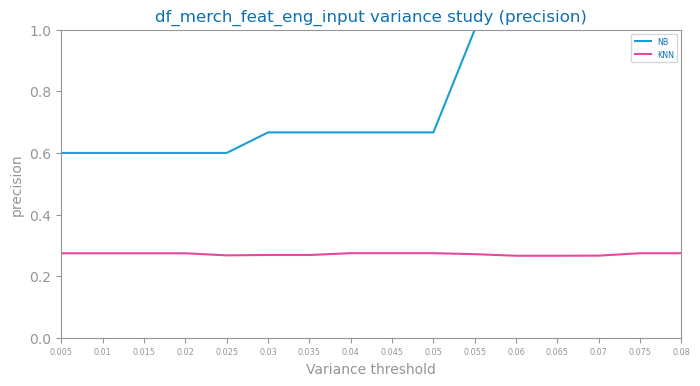

In [69]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "precision"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=max_thresh,
        lag=lag_variance,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 3,  # Minimum features safeguard
        exclude_column='day_of_year'

    )
    show()

### recall

Testing threshold: 0.005
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.005: {'accuracy': [0.46702439919280864, 0.6269491836360301], 'recall': [0.7516438098816457, 0.2729663723464212], 'precision': [0.2797902097902098, 0.25415427671855867], 'auc': [0.563371204133833, 0.5071221037146219], 'f1': [0.40778678081842734, 0.26322463768115945], 'f2': [0.5620645088783996, 0.2689844126032063]}
Evaluation for recall: [0.7516438098816457, 0.2729663723464212]
Testing threshold: 0.01
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.01: {'accuracy': [0.46702439919280864, 0.6269491836360301], 'recall': [0.7516438098816457, 0.2729663723464212], 'precision': [0.2797902097902098, 0.25415427671855867], 'auc': [0.563371204133833, 0.5071221037146219], 'f1': [0.40778678081842734, 0.26322463768115945], 'f2': [0.5620645088783996, 0.2689844126032063]}
Evaluation for recall: [0.7516438098816457

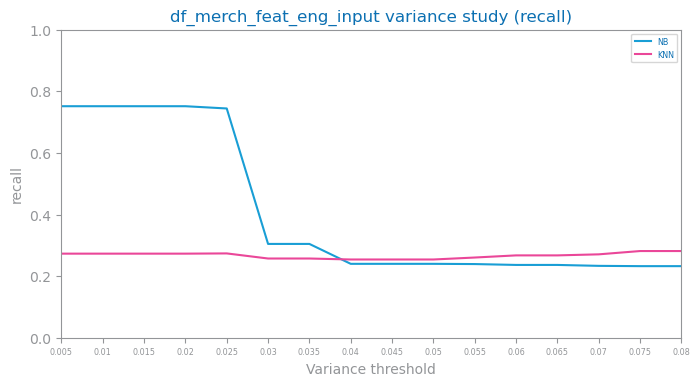

In [70]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=max_thresh,
        lag=lag_variance,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 3,  # Minimum features safeguard
        exclude_column='day_of_year'

    )
    show()

### f2

Testing threshold: 0.005
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.005: {'accuracy': [0.46702439919280864, 0.6269491836360301], 'recall': [0.7516438098816457, 0.2729663723464212], 'precision': [0.2797902097902098, 0.25415427671855867], 'auc': [0.563371204133833, 0.5071221037146219], 'f1': [0.40778678081842734, 0.26322463768115945], 'f2': [0.5620645088783996, 0.2689844126032063]}
Evaluation for f2: [0.5620645088783996, 0.2689844126032063]
Testing threshold: 0.01
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.01: {'accuracy': [0.46702439919280864, 0.6269491836360301], 'recall': [0.7516438098816457, 0.2729663723464212], 'precision': [0.2797902097902098, 0.25415427671855867], 'auc': [0.563371204133833, 0.5071221037146219], 'f1': [0.40778678081842734, 0.26322463768115945], 'f2': [0.5620645088783996, 0.2689844126032063]}
Evaluation for f2: [0.5620645088783996, 0.2689

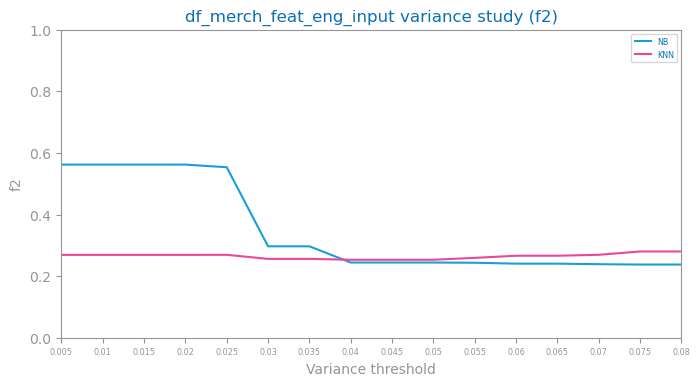

In [71]:
if evaluate==True:

    eval_metric = "f2"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=max_thresh,
        lag=lag_variance,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 3,  # Minimum features safeguard
        exclude_column='day_of_year'

    )
    show()

## Feat 1 strategy Application

In [72]:
from pandas import DataFrame, Index

def apply_strategy_1(df: DataFrame) -> DataFrame:

    # this script is available in data_functions originally from DSLabs site in Feature Selection chapter
    # threshold drop on recall nb is around 0.4 but precision increases
    df_copy=apply_remove_low_variance_variables(df,max_threshold=0.023, target=target, min_features_to_keep=3, exclude=['day_of_year'])
    

    return df_copy


data_1=apply_strategy_1(data)

data_1.describe()


Variance threshold: 0.023, Remaining features: 40
Variables to drop: ['device_mobile_brand_name']
columns to drop: ['device_mobile_brand_name']
Remaining columns: Index(['event_name', 'device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'year',

,event_name,device_category,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,geo_city,...,day_of_week_nr_cos,week_of_month_nr_sin,week_of_month_nr_cos,geo_country,session_engaged,year,quarter,is_weekend,domain,returning_user
count,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,...,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000,363410.000000
mean,0.483452,0.407448,0.548744,0.619824,0.457373,0.849726,0.548114,0.395867,0.461167,0.413189,...,0.542649,0.479602,0.353467,0.146303,0.912972,0.263163,0.263163,0.198209,0.964905,0.259209
std,0.155500,0.485880,0.158519,0.264509,0.242836,0.193538,0.160194,0.162211,0.271503,0.227247,...,0.372312,0.424986,0.304561,0.353410,0.281877,0.440351,0.440351,0.398651,0.184021,0.438201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.416667,0.000000,0.421053,0.333333,0.200000,0.849682,0.500000,0.272727,0.243414,0.189702,...,0.250000,0.000000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.583333,0.000000,0.526316,0.666667,0.457465,0.849682,0.500000,0.363636,0.557849,0.470190,...,0.750000,0.500000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.583333,1.000000,0.631579,0.833333,0.500000,1.000000,0.750000,0.395853,0.675089,0.617886,...,1.000000,1.000000,0.750000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feat 1 train/test split 

Labels=[0.0, 1.0]


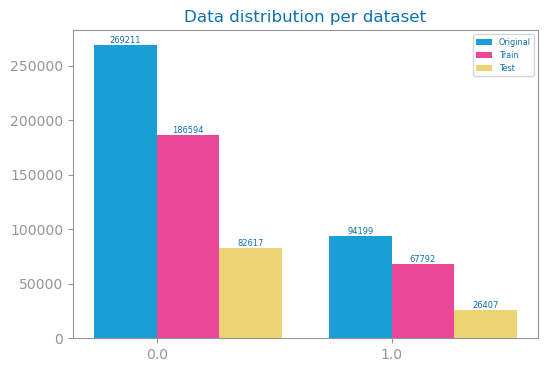

In [73]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    from numpy import array, ndarray


    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)



    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 1 evaluate

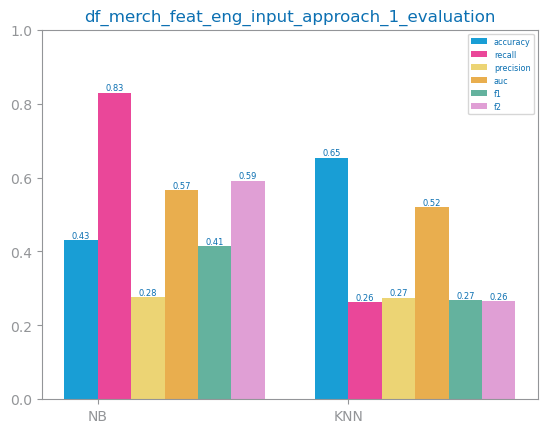

In [74]:
if evaluate==True:

    # evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
    # removed Multinomial from run_NB function because dataset has negative values

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='returning_user', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Feat 2 - Dropping Redundant Variables


## Feat 2 - Study redundant variables and threshold

In [75]:
min_thresh=0.005
lag_redundacy=0.05

### precision

Columns in the train dataset: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'engagement_time_msec', 'month', 'week_number', 'page_path_level_1', 'page_path_level_2', 'page_path_level_3', 'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin', 'local_hour_cos', 'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend', 'domain']
Variables considered for correlation: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_s

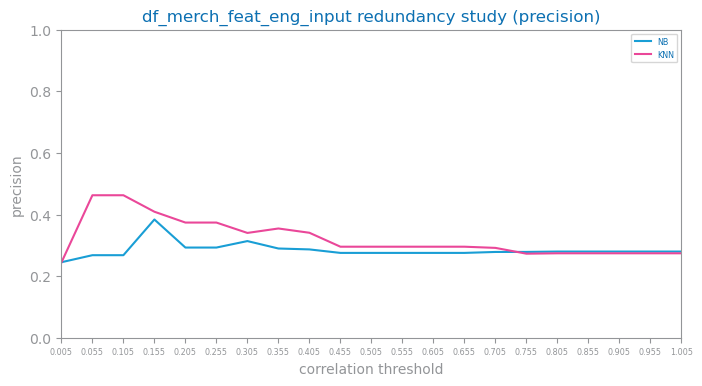

In [76]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "precision"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = min_thresh,
        lag = lag_redundacy,
        metric=eval_metric,
        file_tag=file_tag,
        exclude_column='day_of_year'

    )
    show()

### recall

Columns in the train dataset: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'engagement_time_msec', 'month', 'week_number', 'page_path_level_1', 'page_path_level_2', 'page_path_level_3', 'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin', 'local_hour_cos', 'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend', 'domain']
Variables considered for correlation: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_s

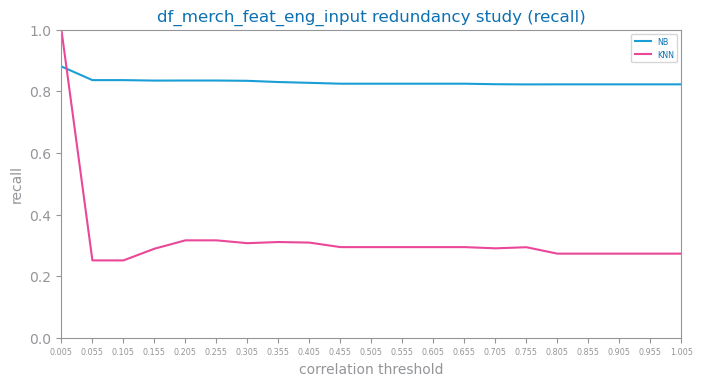

In [77]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = min_thresh,
        lag = lag_redundacy,
        metric=eval_metric,
        file_tag=file_tag,
        exclude_column='day_of_year'
        
    )
    show()

### f2

Columns in the train dataset: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'engagement_time_msec', 'month', 'week_number', 'page_path_level_1', 'page_path_level_2', 'page_path_level_3', 'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin', 'local_hour_cos', 'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend', 'domain']
Variables considered for correlation: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_s

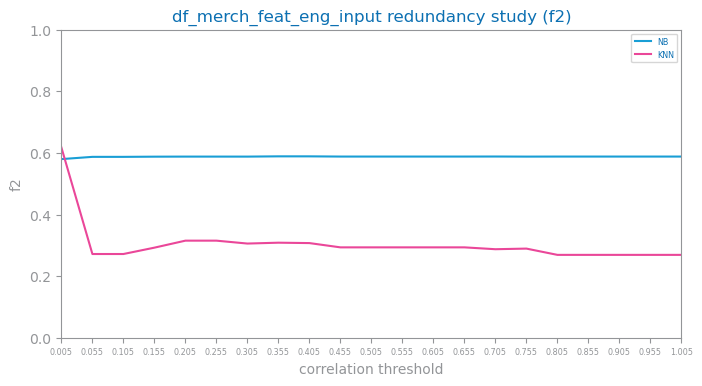

In [78]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = 'f2'
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = min_thresh,
        lag = lag_redundacy,
        metric=eval_metric,
        file_tag=file_tag,
        exclude_column='day_of_year'
        
    )
    show()

## Feat 2 strategy aplication

In [107]:

def apply_strategy_2(df):


    df_copy = apply_remove_redundant_variables(df, min_threshold=0.43, exclude=['day_of_year'], target=target)


    return df_copy


data_2=data.copy()

data_2=apply_strategy_2(data_2)


columns to drop: ['device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_category', 'week_number', 'year', 'quarter', 'month', 'page_path_level_2', 'page_path_level_3', 'path_length', 'page_path_level_1', 'local_hour_sin', 'local_hour_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'time_of_day_sin', 'time_of_day_cos']
Remaining columns: Index(['event_name', 'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'day_of_year', 'local_minute_sin',
       'local_minute_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'is_weekend', 'domain',
       'returning_user'],
      dtype='object')


## Feat 2 train/test split 

Labels=[0.0, 1.0]


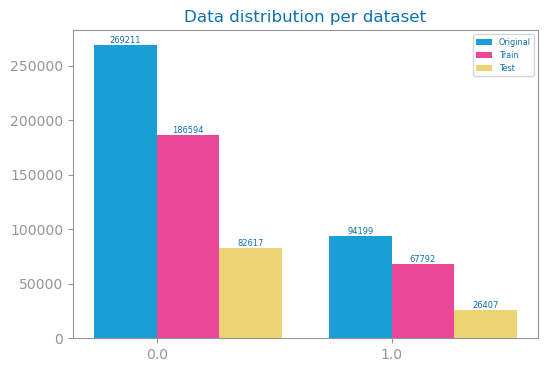

In [108]:
if evaluate ==True:
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the function to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Feat 2 evaluate

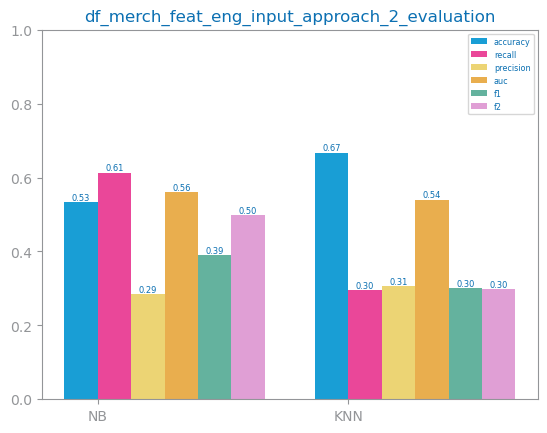

In [109]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric='f2')
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [110]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.429850  0.829931  0.275379  0.565952  0.413541  0.591643   
KNN           0.653773  0.262355  0.274964  0.520619  0.268512  0.264783   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.533791  0.613398  0.285091  0.560872  0.389263  0.498569   
KNN           0.666991  0.295111  0.305788  0.540483  0.300355  0.297186   

               Uplift                                                    
             accuracy    recall precision       auc        f1        f2  
Naive Bayes  0.103940 -0.216533  0.009712 -0.005080 -0.024278 -0.093074  
KNN          0.013217  0.032756  0.030823  0.019864  0.031843  0.032403

# Analysis

- experiment both with feat eng and without
- 0.09 max threshold for increased recall but will remove major columns for DT like traffic_source and traffic_medium


### moving with approach 1 at 0.023 max threshold

- slight improvement on NB approach 1 in all metrics but increased accuracy the most significant. 
- slight loss on recall but prevailed on f2 with increased precisoin
- columns to drop: ['device_mobile_brand_name']



# save to csv

In [113]:
if test_data==False:
    
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/df_merch_6_feat_eng_input.csv", index=False)


    print(data_save.columns)



Variance threshold: 0.023, Remaining features: 40
Variables to drop: ['device_mobile_brand_name']
columns to drop: ['device_mobile_brand_name']
Remaining columns: Index(['event_name', 'device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'year',

## train test csv

In [114]:
if test_data==False:
    

    # data_save_copy=data_save.copy() 
    
    train,test=simple_split_df(data_save,sort_by='day_of_year')
    
    train.to_csv(f"data/df_merch_6_feat_eng_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_6_feat_eng_input_test.csv", index=False)
    print(test.columns)

Index(['event_name', 'device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'year', 'quarter', 'is_weekend', 'domain',
       'returning_user'],
      dtype='object')
Index(['event_name', 'device_category', 'device_mobile_model_name',
       'dev